In [1]:
import json
import os
from dotenv import load_dotenv

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load environment variables from .env file
load_dotenv()
API_KEY = os.getenv('EOD_HISTO_DATA_API_KEY')

### Get user data

In [4]:
url = f"https://eodhd.com/api/user?api_token={API_KEY}&fmt=json"
data = requests.get(url).json()
data

### Get Exchanges

In [4]:
exchanges = pd.read_json(f"https://eodhistoricaldata.com/api/exchanges-list/?api_token={API_KEY}")


In [7]:
# exchanges[40:]
exchanges[exchanges['Code'].str.contains('XE')]


,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
7,XETRA Stock Exchange,XETRA,XETR,Germany,EUR,DE,DEU


### Get Contracts

In [19]:
EXCHANGE_CODE = "US"
contracts = pd.read_json(f"https://eodhistoricaldata.com/api/exchange-symbol-list/{EXCHANGE_CODE}?api_token={API_KEY}&fmt=json")

,Code,Name,Country,Exchange,Currency,Type,Isin
0,0P0000A412,Franklin U.S. Opportunities Fund A,USA,PINK,USD,FUND,None
1,0P0000RX5G,Franklin Floating Rate Fund PLC W USD Dis,USA,PINK,USD,FUND,None
2,0P0001GXZ7,Oaktree Global Credit Fund P,USA,OTC,USD,FUND,None
3,0P0001NGF5,Liontrust GF Sust Fut MA Glbl B8 Acc USD,USA,PINK,USD,FUND,None
4,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
...,...,...,...,...,...,...,...
47683,ZYME,Zymeworks Inc. Common Stock,USA,NASDAQ,USD,Common Stock,CA98985W1023
47684,ZYXI,Zynex Inc,USA,NASDAQ,USD,Common Stock,US98986M1036
47685,ZZHGF,ZhongAn Online P & C Insurance Co. Ltd,USA,PINK,USD,Common Stock,None
47686,ZZHGY,ZhongAn Online P & C Insurance Co. Ltd,USA,PINK,USD,Common Stock,None


In [20]:
contracts['Type'].value_counts()

FUND               23888
Common Stock       18083
ETF                 3737
Mutual Fund         1329
Preferred Stock      508
Unit                 134
Note                   3
ETC                    2
Bond                   1
Name: Type, dtype: int64

In [32]:
# show contracts of type 'Stock'
contracts[contracts['Type'] == 'ETF'][:50]

,Code,Name,Country,Exchange,Currency,Type,Isin
6,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,US53656F6566
26,AAAU,Goldman Sachs Physical Gold ETF,USA,BATS,USD,ETF,US38150K1034
91,AADR,AdvisorShares Dorsey Wright ADR ETF,USA,NASDAQ,USD,ETF,US00768Y2063
187,AAPB,GraniteShares ETF Trust - GraniteShares 2x Lon...,USA,NASDAQ,USD,ETF,US38747R8842
188,AAPD,Direxion Shares ETF Trust - Direxion Daily AAP...,USA,NASDAQ,USD,ETF,US25461A3041
192,AAPR,Innovator Equity Defined Protection ETF - 2 Yr...,USA,BATS,USD,ETF,None
194,AAPU,Direxion Shares ETF Trust - Direxion Daily AAP...,USA,NASDAQ,USD,ETF,US25461A8743
195,AAPX,Etf Opportunities Trust - T Rex 2x Long Apple ...,USA,BATS,USD,ETF,None
196,AAPY,Kurv Yield Premium Strategy Apple (AAPL) ETF,USA,BATS,USD,ETF,None
226,AAXJ,iShares MSCI All Country Asia ex Japan ETF,USA,NASDAQ,USD,ETF,US4642881829


### Get Historical Quotes

In [19]:
FROM = "2020-01-01"
TO = "2024-09-01"
TICKER = "RR.LSE"
url = f"https://eodhistoricaldata.com/api/eod/{TICKER}?api_token={API_KEY}&from={FROM}&to={TO}"
quotes = pd.read_csv(url, skipfooter=1)
quotes.head()

/var/folders/qt/k5txb7556tz0pk9dmksrt2sr0000gn/T/ipykernel_96618/171890149.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  quotes = pd.read_csv(url, skipfooter=1)


,Date,Open,High,Low,Close,Adjusted_close,Volume
0,2020-01-02,688.8006,696.0006,678.6006,681.2006,218.2941,11219732
1,2020-01-03,678.0006,680.8006,667.4006,677.8006,217.2046,12363024
2,2020-01-06,674.0006,681.2006,667.1126,677.0006,216.9482,11385517
3,2020-01-07,682.0006,682.6406,663.4006,668.2006,214.1282,9566798
4,2020-01-08,662.4006,669.0006,657.2006,665.6006,213.2950,11775530


In [44]:
# Convert the 'Date' column to datetime
quotes['Date'] = pd.to_datetime(quotes['Date'])


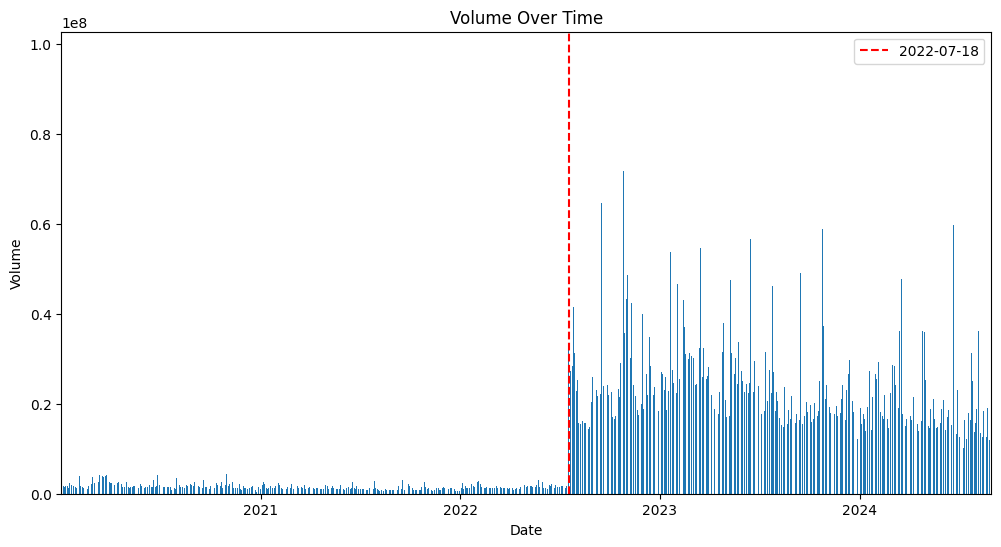

In [45]:
import matplotlib.dates as mdates

subquotes = quotes[quotes['Date'] > '2020-01-01']
subquotes = subquotes[subquotes['Date'] < '2024-12-31']

plt.figure(figsize=(12, 6))
plt.bar(subquotes['Date'], subquotes['Volume'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Format the x-axis to show only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set the x-axis limits to start from 2020
plt.xlim([subquotes['Date'].min(), subquotes['Date'].max()])

# Mark the date 2022-07-18
plt.axvline(pd.to_datetime('2022-07-18'), color='red', linestyle='--', label='2022-07-18')
plt.legend()

plt.show()

#### Split/Dividend Adjustment

In [100]:
quotes['k'] = quotes['Close'] / quotes['Adjusted_close']
quotes['Open'] = quotes['Open'] / quotes['k']
quotes['High'] = quotes['High'] / quotes['k']
quotes['Low'] = quotes['Low'] / quotes['k']
quotes.drop(['Close', 'k'], axis='columns', inplace=True)
quotes.rename(columns={"Adjusted_close": "Close"}, inplace=True)

In [106]:
quotes.head()

,Date,Open,High,Low,Close,Volume
0,2022-02-23,237.929202,241.457756,222.924928,223.7846,56651078
1,2022-02-24,210.069827,237.909202,208.820303,237.3894,73580062
2,2022-02-25,237.119464,242.077571,233.720762,241.4778,52886551
3,2022-02-28,239.828400,246.555831,236.979589,243.7569,47731859
4,2022-03-01,242.817293,243.676965,231.231717,234.6804,41205602


### Get Dividends And Splits

In [88]:
url = f"https://eodhistoricaldata.com/api/div/{TICKER}?api_token={API_KEY}&from={FROM}&fmt=json"
dividends = requests.get(url=url)

In [89]:
dividends.json()

[{'date': '2017-05-19',
  'declarationDate': None,
  'recordDate': '2017-05-23',
  'paymentDate': '2017-06-14',
  'period': 'Quarterly',
  'value': 0.035,
  'unadjustedValue': 0.14,
  'currency': 'USD'},
 {'date': '2017-08-22',
  'declarationDate': '2017-08-10',
  'recordDate': '2017-08-24',
  'paymentDate': '2017-09-18',
  'period': 'Quarterly',
  'value': 0.035,
  'unadjustedValue': 0.14,
  'currency': 'USD'},
 {'date': '2017-11-22',
  'declarationDate': '2017-11-09',
  'recordDate': '2017-11-24',
  'paymentDate': '2017-12-15',
  'period': 'Quarterly',
  'value': 0.0375,
  'unadjustedValue': 0.15,
  'currency': 'USD'},
 {'date': '2018-02-22',
  'declarationDate': '2018-02-08',
  'recordDate': '2018-02-23',
  'paymentDate': '2018-03-16',
  'period': 'Quarterly',
  'value': 0.0375,
  'unadjustedValue': 0.15,
  'currency': 'USD'},
 {'date': '2018-05-23',
  'declarationDate': '2018-05-10',
  'recordDate': '2018-05-24',
  'paymentDate': '2018-06-15',
  'period': 'Quarterly',
  'value': 0.

In [90]:
url = f"https://eodhistoricaldata.com/api/splits/{TICKER}?api_token={API_KEY}&from={FROM}"
splits = requests.get(url=url)

In [91]:
splits.text

'Date,"Stock Splits"\n2021-07-20,4.000000/1.000000\n49'

### Speedtest historical quotes

In [104]:
for TICKER in ["NVDA.US", "TSLA.US", "MSFT.US", "AMZN.US", "NFLX.US"]:
    url = f"https://eodhistoricaldata.com/api/eod/{TICKER}?api_token={API_KEY}&from={FROM}&to={TO}"
    quotes = requests.get(url=url)
    # print("-", end="")
    # url = f"https://eodhistoricaldata.com/api/div/{TICKER}?api_token={API_KEY}&from={FROM}&fmt=json"
    # dividends = requests.get(url=url)
    # print("-", end="")
    # url = f"https://eodhistoricaldata.com/api/splits/{TICKER}?api_token={API_KEY}&from={FROM}"
    # splits = requests.get(url=url)
    print("-")


-
-
-
-
-


In [41]:
EXCHANGE = "US"
DATE = "2020-01-02"
url = f"https://eodhd.com/api/eod-bulk-last-day/{EXCHANGE}?api_token={API_KEY}&date={DATE}"
bulk_quotes = pd.read_csv(url, skipfooter=1)
bulk_quotes.head()

/var/folders/qt/k5txb7556tz0pk9dmksrt2sr0000gn/T/ipykernel_42574/116623375.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  bulk_quotes = pd.read_csv(url, skipfooter=1)


,Code,Ex,Date,Open,High,Low,Close,Adjusted_close,Volume
0,0P0000RX5G,US,2020-01-02,8.98,8.98,8.980,8.98,8.0460,0.0
1,A,US,2020-01-02,85.90,86.35,85.200,85.95,83.3505,1410500.0
2,AA,US,2020-01-02,21.86,21.86,21.315,21.42,20.7718,3062500.0
3,AAAAX,US,2020-01-02,10.60,10.60,10.600,10.60,9.5558,0.0
4,AAACX,US,2020-01-02,10.24,10.24,10.240,10.24,7.4232,0.0


In [42]:
bulk_quotes[bulk_quotes['Code'] == 'GOOG']

,Code,Ex,Date,Open,High,Low,Close,Adjusted_close,Volume
16934,GOOG,US,2020-01-02,1341.55,1368.14,1341.55,1367.37,68.201,1406731.0
